In [ ]:
# 학습목표
# 텍스트와 시계열 데이터 같은 순차 데이터에 맞는 순환 신경망의 개념과 구성요소 학습
# 케라스 API로 기본적인 순환신경망에서 고급 신경망을 만들어 영화 감상평을 분류하는 작업
# 순환신경망에서 발생한느 문제점과 이를 극복하기 위한 해결책을 찾아본다.

In [ ]:
# 순차 데이터와 순환 신경망
# Sequential data
# 해당 요소들에 대한 개념

# CH9-2. 순환 신경망으로 IMDB리뷰 분류하기

In [ ]:
# 텐서플로를 사용해 순환 신경망을 만들어 영화리뷰 데이터셋에 적용해서 리뷰를 긍정과 부정으로 나눈다.

In [ ]:
# 데이터 셋을 두가지 방법으로 변형하여 순환신경망에 주입하는데
# 첫 번째는 원-핫인코딩방식
# 두 번째는 단어 임베딩 방식이다.

In [ ]:
# 어떠한 문장에서 단어들로 나누고 그 단어들의 번호를 매기는 것을 '토큰'이라고 한다.
# 즉, I LOVE YOU 라는 샘플(문장)이 있을 때 각 'i', 'love', 'you' 단어로 나뉘고
# 'i': 10, 'love':20, 'you':30 이런식으로 토큰화 하는 것이다.
# 토큰화를 하는 가장 큰 이유는 컴퓨터에 인식될 수 있는 문자로 변형함에 있다.

In [1]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=300)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [4]:
# 첫번째 샘플 토큰수
print(len(train_input[0]))

# 두번째 샘플 토큰수
print(len(train_input[1]))

218
189


In [5]:
# 첫번째 리뷰 확인
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [6]:
# 타깃 데이터 출력해보기
# 0은 부정, 1은 긍정값이다.
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [7]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [8]:
# 넘파이 배열에 담아보기
# 담는이유: 평균적인 리뷰의 길이와 가장짧은/길은 길이를 확인하기 위함
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [9]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


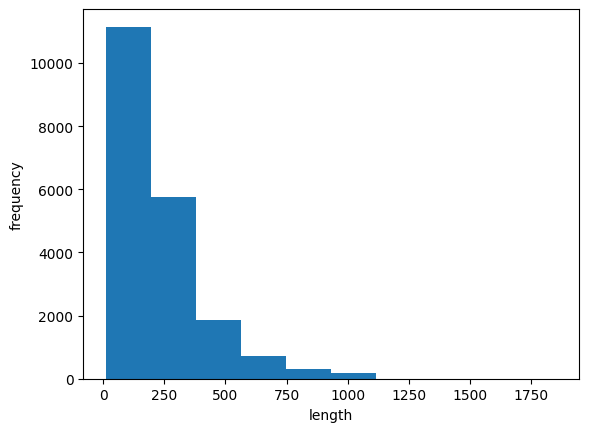

In [10]:
# 그림으로 확인해보기
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [11]:
# 그래프확인결과 길이가 다 제각각 인 샘플이 많았기 때문에 모든 샘플의 최대 수를 100으로 맞춰주기
# 많은 것은 자르고
# 적은 것은 패딩을 통해서 100으로 맞춰주는 작업을 의미한다.
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [12]:
# 2만개의 샘플이 모두 크기가 100으로 맞춰진 것을 알 수 있다.
print(train_seq.shape)

(20000, 100)


In [13]:
print(train_seq[0])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


In [14]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


In [15]:
# 앞쪽에 0이 있는 것으로 보아 100보다 안되서 패딩으로 0이 추가된 것을 알 수 있다.
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94 205   2  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [16]:
# 검증세트도 100으로 맞춰주기
val_seq = pad_sequences(val_input, maxlen=100)

In [17]:
# 순환신경망 만들기
# input_shape가 100,300인 것은 100은 데이터의 길이, 300은 총 나올 수 있는 단어가 300개 이기 때문이다.
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 300)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [18]:
# 원-핫인코딩하기
train_oh = keras.utils.to_categorical(train_seq)

In [19]:
# 출력
print(train_oh.shape)

(20000, 100, 300)


In [20]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [21]:
# 모든값의 합이 1이어야 원-핫인코딩이 잘된 것이다.
# 원핫인코딩은 원하는 단어를 제외하고 나머지를 모두 0으로 처리하기 때문이다.
print(np.sum(train_oh[0][0]))

1.0


In [22]:
#검증데이터도 같은방식으로 바꿔주기
val_oh = keras.utils.to_categorical(val_seq)

In [23]:
# simpleRNN에 전달할 크기는 100,300 이지만 순환층 타임스텝의 은닉상태만 출력한다.
# 출력크기가 순환층의 뉴런개수와 동일한 8이다.
# 입력토큰은 300차원의 원-핫인코딩, 순환층의 뉴런 8개 = 300*8=2400
# 8(은닉상태크기) * 8(뉴런개수) = 64개의 가중치
# 2400 + 64 + 8
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 2472      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 2481 (9.69 KB)
Trainable params: 2481 (9.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# 순환 신경망 훈련하기
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 12s 36ms/step - loss: 0.6980 - accuracy: 0.4936 - val_loss: 0.6959 - val_accuracy: 0.4972
Epoch 2/100
  1/313 [..............................] - ETA: 10s - loss: 0.6880 - accuracy: 0.5469

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 11s 34ms/step - loss: 0.6950 - accuracy: 0.4979 - val_loss: 0.6941 - val_accuracy: 0.5022
Epoch 3/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6936 - accuracy: 0.5044 - val_loss: 0.6932 - val_accuracy: 0.5090
Epoch 4/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6928 - accuracy: 0.5095 - val_loss: 0.6926 - val_accuracy: 0.5146
Epoch 5/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6921 - accuracy: 0.5156 - val_loss: 0.6921 - val_accuracy: 0.5126
Epoch 6/100
313/313 [==============================] - 9s 30ms/step - loss: 0.6915 - accuracy: 0.5240 - val_loss: 0.6915 - val_accuracy: 0.5216
Epoch 7/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6910 - accuracy: 0.5284 - val_loss: 0.6911 - val_accuracy: 0.5246
Epoch 8/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6902 - accuracy: 0.5344 - val_loss: 0.6906 - val_accuracy: 0.5270


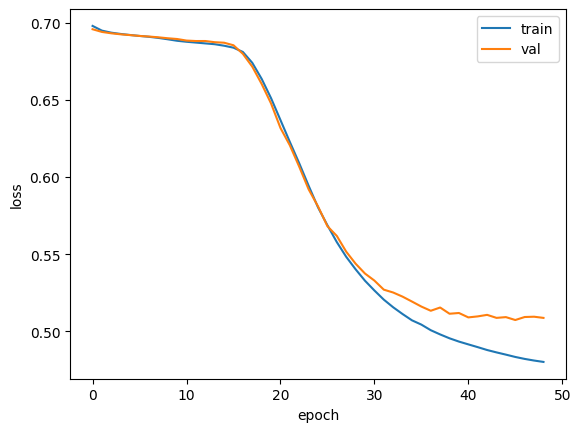

In [25]:
# 그래프 그려보기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [27]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 2400000000


In [28]:
# 단어 임베딩을 사용하기
# 임베딩300은 단어사전의 크기이다.
# 16은 매개변수 임베딩 벡터의 크기
# input_length는 입력 시퀀스의 길이
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(300, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [29]:
# 모델 파라미터 개수를 계산해보기
# Embedding클래스는 300개의 각 토큰을 크기가 16인 벡터로 변경
# => 300*16 =4800개의 모델파라미터를 가진다.
# 이후로 SimpleRNN층의 임베딩 벡터의 크기가 16이기에 8개의 뉴런과 곱하기 위해
# => 16 * 8 = 128개의 가중치를 갖는다.
# 은닉 상태에 곱해지는 가중치 8 * 8 =64개이고, 마지막으로 절편이 8개이므로
# 전체 파라미터는 128+64+8= 200개가 된다.
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           4800      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5009 (19.57 KB)
Trainable params: 5009 (19.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-enmbedding-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 6s 17ms/step - loss: 0.6966 - accuracy: 0.5090 - val_loss: 0.6925 - val_accuracy: 0.5242
Epoch 2/100
 10/313 [..............................] - ETA: 4s - loss: 0.6943 - accuracy: 0.5094

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 5s 16ms/step - loss: 0.6918 - accuracy: 0.5227 - val_loss: 0.6901 - val_accuracy: 0.5346
Epoch 3/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6883 - accuracy: 0.5402 - val_loss: 0.6883 - val_accuracy: 0.5430
Epoch 4/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6853 - accuracy: 0.5533 - val_loss: 0.6866 - val_accuracy: 0.5470
Epoch 5/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6824 - accuracy: 0.5642 - val_loss: 0.6853 - val_accuracy: 0.5522
Epoch 6/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6794 - accuracy: 0.5727 - val_loss: 0.6837 - val_accuracy: 0.5558
Epoch 7/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6763 - accuracy: 0.5784 - val_loss: 0.6825 - val_accuracy: 0.5544
Epoch 8/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6731 - accuracy: 0.5882 - val_loss: 0.6811 - val_accuracy: 0.5546
Epoc

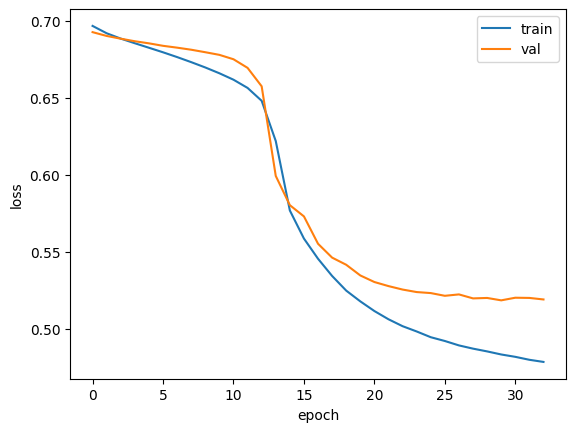

In [32]:
# 그래프화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()